In [29]:
import pandas
oil_daily = pandas.read_csv('~/Desktop/covid-economics/datasets/data_crudeoil_daily_1986-2020.csv', parse_dates=['DATE'])
print(oil_daily)
oil_monthly = pandas.read_csv('~/Desktop/covid-economics/datasets/data_crudeoil_monthly_1986-2020.csv', parse_dates=['DATE'])
print(oil_monthly)

           DATE DCOILWTICO
0    1986-01-02      25.56
1    1986-01-03      26.00
2    1986-01-06      26.53
3    1986-01-07      25.85
4    1986-01-08      25.87
...         ...        ...
8923 2020-03-17          .
8924 2020-03-18      26.96
8925 2020-03-19      20.48
8926 2020-03-20      25.09
8927 2020-03-23      19.48

[8928 rows x 2 columns]
          DATE  MCOILWTICO
0   1986-01-01       22.93
1   1986-02-01       15.46
2   1986-03-01       12.61
3   1986-04-01       12.84
4   1986-05-01       15.38
..         ...         ...
404 2019-09-01       56.95
405 2019-10-01       53.96
406 2019-11-01       57.03
407 2019-12-01       59.88
408 2020-01-01       57.52

[409 rows x 2 columns]


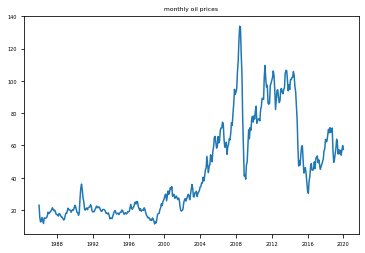

In [30]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime, timedelta



plt.plot(oil_monthly.DATE, oil_monthly.MCOILWTICO)
plt.title("monthly oil prices")
plt.rcParams.update({'font.size': 5})

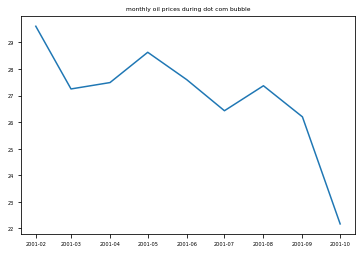

In [31]:
dotcom_m = oil_monthly[(oil_monthly.DATE > datetime(2001,1,1)) & (oil_monthly.DATE < datetime(2001,11,1))]
plt.plot( dotcom_m.DATE, dotcom_m.MCOILWTICO) 
plt.title("monthly oil prices during dot com bubble")
plt.rcParams.update({'font.size': 7})
#on wikipedia dotcom bubble is March 2001-November


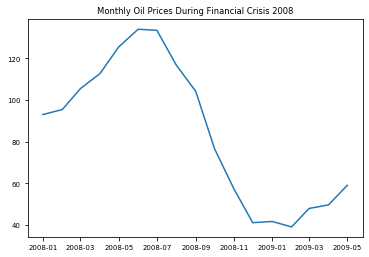

In [32]:
#financial crisis 2007.12-2009.6.1
crisis_08 = oil_monthly[(oil_monthly.DATE > datetime(2007,12,1)) & (oil_monthly.DATE < datetime(2009,6,1))]
crisis_08.head()
plt.plot(crisis_08.DATE, crisis_08.MCOILWTICO)
plt.title('Monthly Oil Prices During Financial Crisis 2008')
plt.rcParams.update({'font.size': 7})

In [37]:
#preprocessing for time series monthly
# import numpy as np
# oil_monthly['MCOILWTICO_log'] = np.log(oil_monthly['MCOILWTICO'])
# oil_monthly['MCOILWTICO_log_diff'] = oil_monthly['MCOILWTICO_log'] - oil_monthly['MCOILWTICO_log'].shift(1)
# oil_monthly['MCOILWTICO_log_diff'].dropna().plot()

# oil_monthly.head()

import numpy as np
oil_daily = oil_daily.drop(oil_daily[oil_daily.DCOILWTICO == '.'].index)
oil_daily.DCOILWTICO = oil_daily['DCOILWTICO'].astype(float)
covid_daily = oil_daily[(oil_daily.DATE >= datetime(2019,12,31)) & (oil_daily.DATE < datetime(2020,3,31))]
oil_daily_after08 = oil_daily[(oil_daily.DATE >= datetime(2009,9,1)) & (oil_daily.DATE < datetime(2020,3,31))]
oil_daily_after08


,DATE,DCOILWTICO
6173,2009-09-01,68.11
6174,2009-09-02,68.03
6175,2009-09-03,67.90
6176,2009-09-04,67.95
6178,2009-09-08,71.08
...,...,...
8922,2020-03-16,28.96
8924,2020-03-18,26.96
8925,2020-03-19,20.48
8926,2020-03-20,25.09


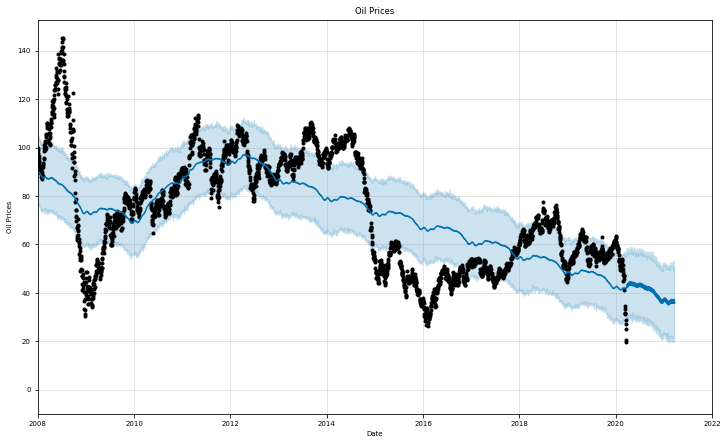

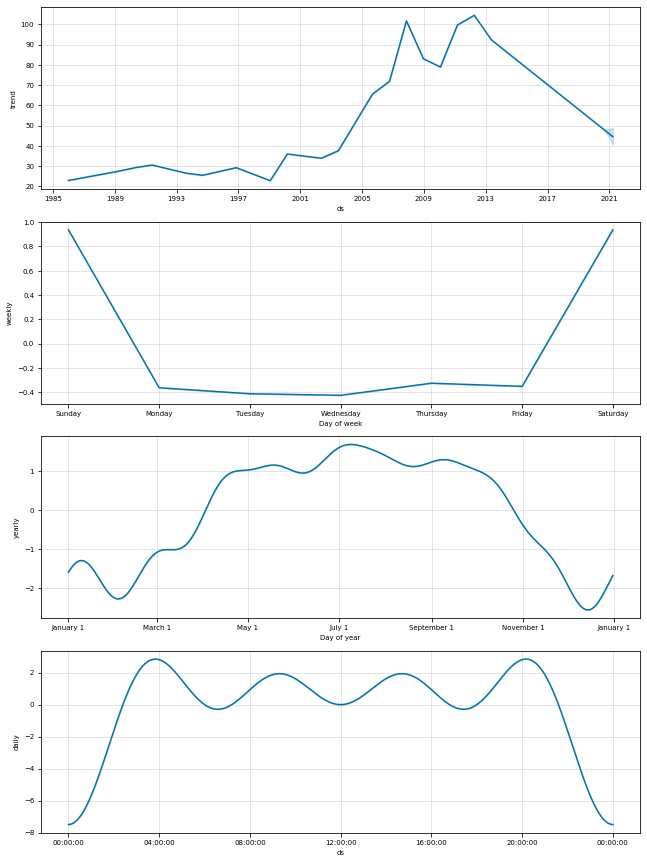

In [36]:
#Facebook Prophet model: https://facebook.github.io/prophet/
from fbprophet import Prophet
m = Prophet(changepoint_prior_scale=0.15, yearly_seasonality=True, daily_seasonality=True)
covid_daily_2 = covid_daily.rename(columns={'DATE': 'ds', 'DCOILWTICO': 'y'})
oil_daily_2 = oil_daily.rename(columns={'DATE': 'ds', 'DCOILWTICO': 'y'})
m.fit(oil_daily_2)
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)
m.plot(forecast, xlabel = 'Date', ylabel = 'Oil Prices')
plt.title('Oil Prices')
plt.xlim(datetime(2008,1,1), datetime(2022,1,1))

# fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


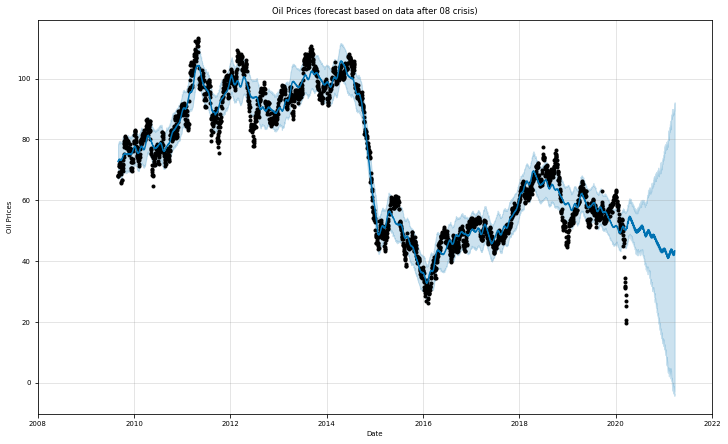

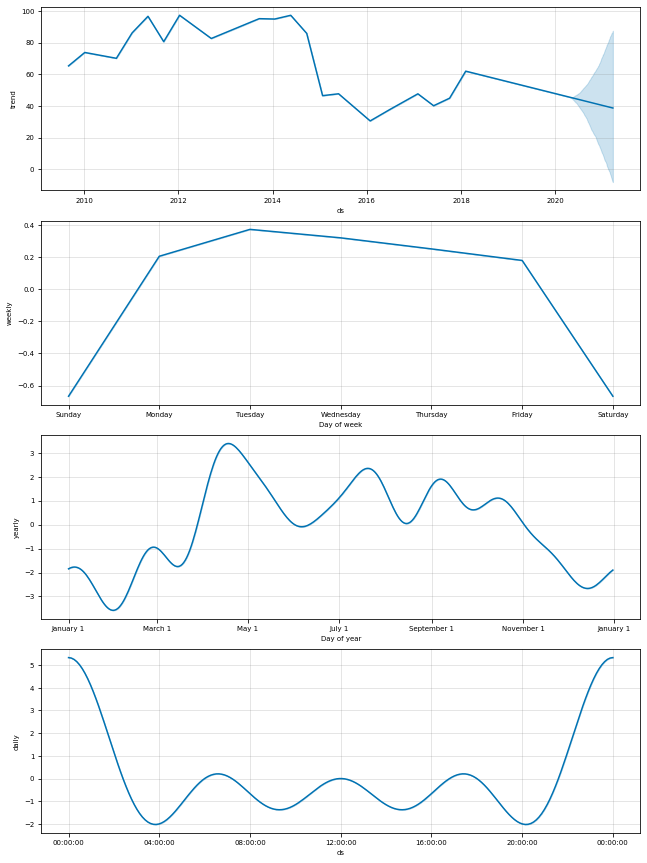

In [42]:
m2 = Prophet(changepoint_prior_scale=0.15, yearly_seasonality=True, daily_seasonality=True)
after_08_2 = oil_daily_after08.rename(columns={'DATE': 'ds', 'DCOILWTICO': 'y'})
m2.fit(after_08_2)
future = m2.make_future_dataframe(periods=365, freq='D')
forecast = m2.predict(future)
m2.plot(forecast, xlabel = 'Date', ylabel = 'Oil Prices')
plt.title('Oil Prices (forecast based on data after 08 crisis)')
plt.xlim(datetime(2008,1,1), datetime(2022,1,1))

# fig1 = m.plot(forecast)
fig2 = m2.plot_components(forecast)

In [ ]:
oil_daily['DCOILWTICO_log'] = np.log(oil_daily.DCOILWTICO)
oil_daily['DCOILWTICO_log_diff'] = oil_daily['DCOILWTICO_log'] - oil_daily['DCOILWTICO_log'].shift(1)
oil_daily['DCOILWTICO_log_diff'].dropna().plot()

oil_daily.head()

In [72]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = oil_daily[['DATE','MCOILWTICO_log_diff']]
time_data = data[(data.DATE > datetime(2019,12,1)) & (data.DATE < datetime(2020,4,1))]
y = np.asarray(time_data['MCOILWTICO_log_diff'])
# fit model
model = ARMA(y, order=(2, 1))
model_fit = model.fit(disp=False)
# # make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

ValueError: Insufficient degrees of freedom to estimate